In [1]:
import pandas as pd
df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)
print(df.shape)
print(len(df))
df

(366, 5)
366


,2018,2019,2020,2021,2022
0,337485,686993,1284272,1244317,1285112
1,1030556,1920106,985410,1499299,805926
2,1030556,1598395,985410,1115398,1198180
3,697207,1621244,110652,213313,2054215
4,1464201,148152,985410,1020265,1198180
...,...,...,...,...,...
361,125924,643626,985410,2648166,1669346
362,2477337,995967,3430383,1001102,1113987
363,1030556,392141,985410,966369,278274
364,1030556,1054901,134188,178873,416466


In [2]:
import numpy as np

X = []
y = []

for i in range(len(df)):  
    X.append(df.iloc[i].values)

    y.append(df.iloc[i].values[-1])

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (366, 5)
y shape: (366,)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

class CNNForecast(nn.Module):
    def __init__(self):
        super(CNNForecast, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNForecast()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
batch_size = 365

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i in range(0, len(X_tensor), batch_size):
        inputs = X_tensor[i:i+batch_size]
        labels = y_tensor[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model(inputs)
        optimizer.step()
    # print(f'Epoch {epoch+1}/{epochs}')

model.eval()
with torch.no_grad():
    predictions = model(X_tensor)
predictions = abs(predictions.numpy())

for i in range(len(predictions)):
    predictions[i][0] = predictions[i][0]*60
    print(f"Day {i+1}: {predictions[i][0]}")

Day 1: 346335.5625
Day 2: 517803.40625
Day 3: 431046.625
Day 4: 437208.1875
Day 5: 394857.40625
Day 6: 496489.28125
Day 7: 493662.9375
Day 8: 431344.25
Day 9: 523473.6875
Day 10: 514061.0625
Day 11: 531170.25
Day 12: 191881.75
Day 13: 478097.03125
Day 14: 174165.703125
Day 15: 634935.9375
Day 16: 277914.8125
Day 17: 365259.1875
Day 18: 345803.65625
Day 19: 425489.40625
Day 20: 268587.34375
Day 21: 526617.125
Day 22: 681610.75
Day 23: 417495.625
Day 24: 277914.8125
Day 25: 329716.71875
Day 26: 325355.03125
Day 27: 268587.34375
Day 28: 709859.6875
Day 29: 529337.75
Day 30: 211585.53125
Day 31: 277914.8125
Day 32: 514123.71875
Day 33: 384293.875
Day 34: 403514.59375
Day 35: 380558.9375
Day 36: 277914.8125
Day 37: 693827.8125
Day 38: 398192.09375
Day 39: 296990.40625
Day 40: 342081.125
Day 41: 367518.90625
Day 42: 385457.5
Day 43: 265739.71875
Day 44: 646772.5
Day 45: 282991.5625
Day 46: 649582.5
Day 47: 678952.5625
Day 48: 404766.875
Day 49: 337796.09375
Day 50: 811347.6875
Day 51: 277914

In [4]:
print(len(predictions))

366


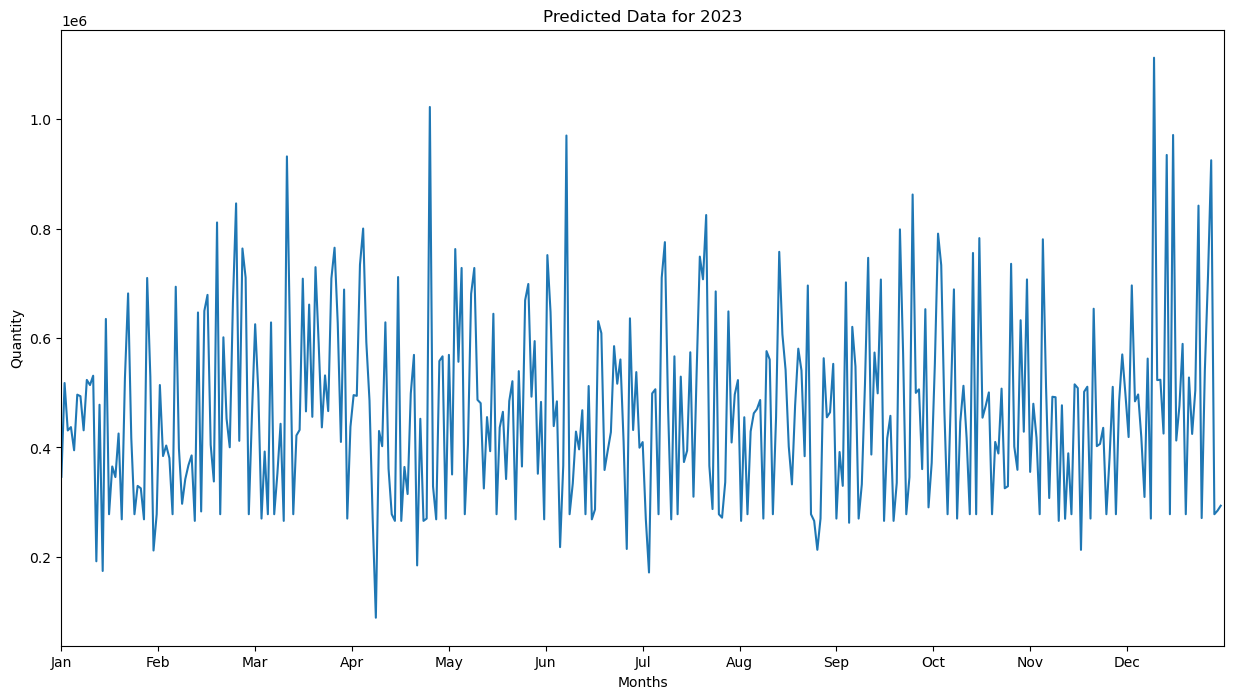

In [7]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(days, predictions, marker='')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title('Predicted Data for 2023')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.show()

In [6]:
import pandas as pd

df2 = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")

new_df = pd.DataFrame(predictions, columns=["2023"])

result_df = pd.concat([df2, new_df], axis=1)

result_df.to_csv(r"D:\NATPAC\Datasets\1D-CNN\upto_2023_1000_epochs.csv", index=False)

print(result_df)

    Month_Day     2018     2019     2020     2021     2022          2023
0       01-01   337485   686993  1284272  1244317  1285112  346335.56250
1       01-02  1030556  1920106   985410  1499299   805926  517803.40625
2       01-03  1030556  1598395   985410  1115398  1198180  431046.62500
3       01-04   697207  1621244   110652   213313  2054215  437208.18750
4       01-05  1464201   148152   985410  1020265  1198180  394857.40625
..        ...      ...      ...      ...      ...      ...           ...
361     12-27   125924   643626   985410  2648166  1669346  714140.81250
362     12-28  2477337   995967  3430383  1001102  1113987  925084.75000
363     12-29  1030556   392141   985410   966369   278274  277914.81250
364     12-30  1030556  1054901   134188   178873   416466  284479.53125
365     12-31   903441  1088381   985410  1001102  1218553  293509.00000

[366 rows x 7 columns]
